In [1]:
import numpyro 
import math
import jax 
import jax.numpy as jnp 
import jax.random as jr 
import numpy as np 
import matplotlib.pyplot as plt 

from jax import random
from numpyro.infer import MCMC, NUTS

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
N_t, N_p = 150 * 50, 25

signal = [[0] for _ in range(N_p)]
for i in range(N_p):
    signal[i][0] = 5 * i * math.sin((2 * math.pi / 25) * i)
signal = np.array(signal)[:,0]

P = [[0] * N_p for _ in range(N_t)]
for row in range(N_t):
    for col in range(N_p):
        P[row][col] = 1 if ((row / 150) // 2 == col) else 0
P = np.array(P)

Data = np.dot(P, signal)

N = N_t
noise = np.random.randn(N) * 10

Data_final = Data + noise

In [4]:
print(noise.shape)

(7500,)


In [14]:
print(signal.shape)
print(Data.shape)
print(Data_final.shape)

(25,)
(7500,)
(7500,)


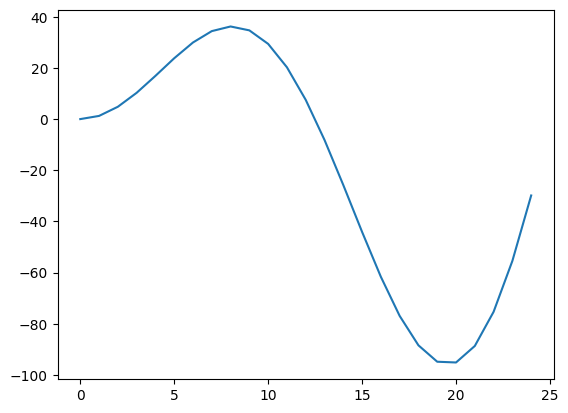

In [5]:
plt.plot(signal)

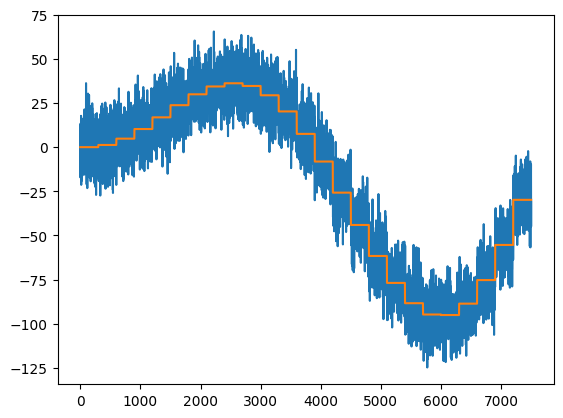

In [6]:
plt.plot(Data_final)
plt.plot(Data)


In [7]:
import numpyro.distributions as dist

def model_func():
        s = numpyro.sample("s", dist.Uniform(low=jnp.full(25,-150), high=jnp.full(25,50)))
        d = P @ s
        print(d.shape)
        d_noised = numpyro.sample("d_noised", dist.Normal(d,10.), obs=Data_final)
        return d_noised

rng_key = random.PRNGKey(0)
nuts_kernel = NUTS(model_func)
mcmc = MCMC(nuts_kernel, num_warmup=50, num_samples=50)
mcmc.run(rng_key)

(7500,)
(7500,)
(7500,)


  0%|          | 0/100 [00:00<?, ?it/s]

(7500,)
(7500,)


sample: 100%|██████████| 100/100 [00:00<00:00, 215.83it/s, 7 steps of size 5.30e-01. acc. prob=0.84]


In [8]:
import arviz as az
trace = az.from_numpyro(mcmc)

(7500,)
(7500,)


In [9]:
trace.posterior['s'].squeeze().shape

(50, 25)

/var/folders/0b/tq5hs3nd30zcmpv164dvt6rc0000gn/T/ipykernel_53133/3740028122.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


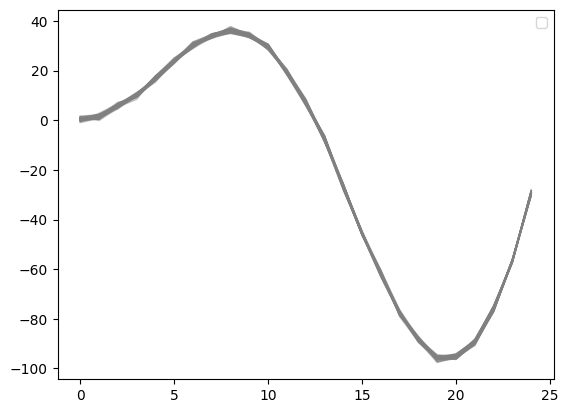

In [10]:
for i in range(50):
    plt.plot(trace.posterior['s'].squeeze()[i,:], color='gray', alpha=0.5, lw=1.0)
#plt.plot(signal, color='red', lw=2.0)
plt.legend()
plt.show()

1.243449435824274


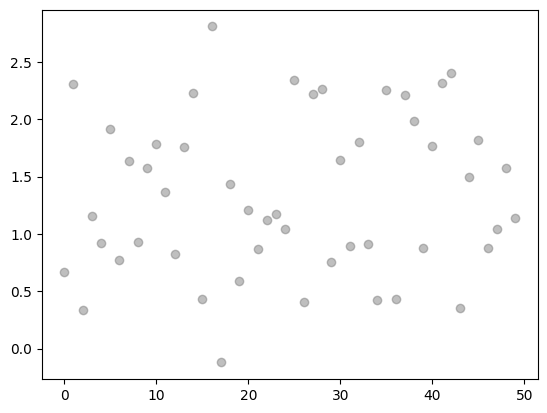

In [11]:
plt.scatter(range(50),trace.posterior['s'].squeeze()[:,1], color='gray', alpha=0.5, lw=1.0)
print(signal[1])